<a href="https://colab.research.google.com/github/sclaudiobr/modelo_espectral/blob/master/datamining_spectro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<p><strong>Minera&ccedil;&atilde;o de dados espectrais com bibliotecas Scikit Learn e computa&ccedil;&atilde;o na nuvem&nbsp;</strong></p>
<p>Claudio R. O. da Silva&sup1;</p>


# 1.  Bibliotecas Básicas
<p> As bibliotecas básicas para a elaboração do modelo devem conter as matrizes através do numpy, a importação e criação de frames com o pandas e a apresentação de gráficos através dos recurso do matplotlib e do seaborn.

In [0]:
#Carregamento das bibliotecas
import numpy as np 
import pandas as pd
import matplotlib as plt
import seaborn as sb
%matplotlib inline

# Carregar dados direto do GitHub

In [0]:
uri = "https://raw.githubusercontent.com/sclaudiobr/modelo_espectral/master/modelo_vis_nir.csv"
spc = pd.read_csv(uri)

In [0]:
spc.columns

Index(['classes', 'visivel', 'infravermelho'], dtype='object')

In [0]:
spc.columns = ['classes', 'visivel','infravermelho']

# Imprimir os dados na tela

In [0]:
spc.head()
#print(spc[:11])

,classes,visivel,infravermelho
0,Grama,0.067121,0.362855
1,Grama,0.067646,0.370370
2,Grama,0.068293,0.370370
3,Grama,0.068530,0.371940
4,Grama,0.068232,0.370612


In [0]:
cls = spc["classes"].unique()

In [0]:
print(cls,cls.shape)

['Grama' 'Solo exposto' 'Brita' 'Vegetacao' 'Solo umido' 'Asfalto'] (6,)


# Estatística dos  dados

In [0]:
spc.describe()

,visivel,infravermelho
count,160.000000,160.000000
mean,0.079868,0.205449
std,0.044285,0.063449
min,0.015128,0.112546
25%,0.052743,0.160680
50%,0.064622,0.217855
75%,0.101526,0.229270
max,0.168822,0.385517


In [0]:
np.array(spc.describe())

array([[1.60000000e+02, 1.60000000e+02],
       [7.98675617e-02, 2.05448872e-01],
       [4.42848832e-02, 6.34494046e-02],
       [1.51280377e-02, 1.12545732e-01],
       [5.27433639e-02, 1.60679676e-01],
       [6.46221886e-02, 2.17855107e-01],
       [1.01525628e-01, 2.29269646e-01],
       [1.68822364e-01, 3.85516750e-01]])

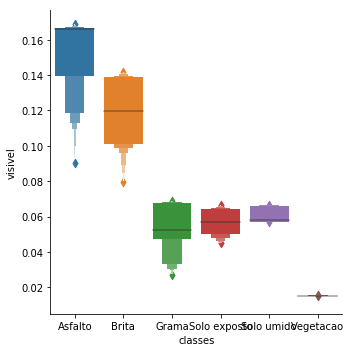

In [0]:
sb.catplot(x="classes", y="visivel", kind="boxen",
            data=spc.sort_values("classes"));

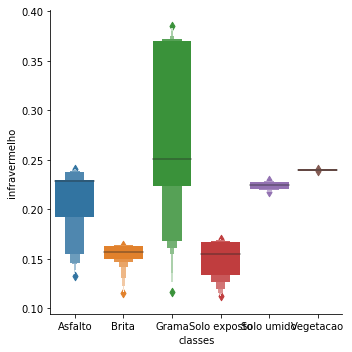

In [0]:
sb.catplot(x="classes", y="infravermelho", kind="boxen",
            data=spc.sort_values("classes"));

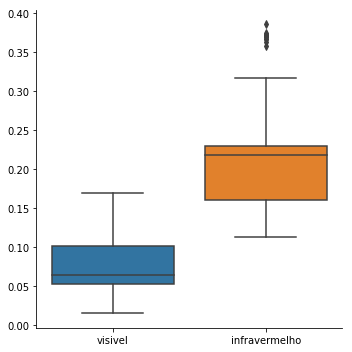

In [0]:
sb.catplot(data=spc, orient="v",kind="box")
#sb.stripplot(data=spc)
#sb.boxenplot(data=spc)


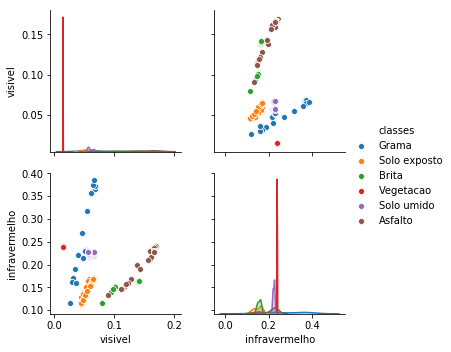

In [0]:
sb.pairplot(data=spc, hue='classes',kind = "scatter")

# Selecão dos valores para classificação supervisionada em um array no Numpy

In [0]:
x = np.array(spc.drop('classes',1))
x[1:20]

array([[0.06764623, 0.3703699 ],
       [0.06829264, 0.3703699 ],
       [0.0685303 , 0.37193987],
       [0.06823197, 0.37061186],
       [0.06801352, 0.36895388],
       [0.06788966, 0.3666568 ],
       [0.06782207, 0.36671311],
       [0.06841119, 0.37139418],
       [0.06870988, 0.37211661],
       [0.05285735, 0.15115339],
       [0.05720971, 0.16540832],
       [0.0585804 , 0.16865555],
       [0.05670028, 0.16314804],
       [0.05282191, 0.15095999],
       [0.04935865, 0.14030188],
       [0.04849751, 0.13711519],
       [0.04749549, 0.13400405],
       [0.04570688, 0.12917283],
       [0.04789454, 0.13581435]])

# Seleção das "Classes" para uma array através do Numpy

In [0]:
y = np.array(spc.classes)
y[1:40]

array(['Grama', 'Grama', 'Grama', 'Grama', 'Grama', 'Grama', 'Grama',
       'Grama', 'Grama', 'Solo exposto', 'Solo exposto', 'Solo exposto',
       'Solo exposto', 'Solo exposto', 'Solo exposto', 'Solo exposto',
       'Solo exposto', 'Solo exposto', 'Solo exposto', 'Brita', 'Brita',
       'Brita', 'Brita', 'Brita', 'Brita', 'Brita', 'Brita', 'Brita',
       'Brita', 'Grama', 'Grama', 'Grama', 'Grama', 'Grama', 'Grama',
       'Grama', 'Grama', 'Grama', 'Grama'], dtype=object)

# Bibliotecas de Modelagem


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# Importando a função train_test_split 
from sklearn.model_selection import train_test_split

#Importando o módulo de metricas de cálculo acurácia do scikit-learn
from sklearn import metrics


# Dividindo o banco de dados em treinamento e teste (x,y, tamanho)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3) # 70% para treino e 30% teste

knn = KNeighborsClassifier(n_neighbors=5, algorithm ='ball_tree')
dtr = DecisionTreeClassifier()
adb = AdaBoostClassifier(n_estimators=20, random_state=1)
rdf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

# Treinamento  do classificador

In [0]:
knn.fit(X_train,y_train)
dtr.fit(X_train,y_train)
adb.fit(X_train,y_train)
rdf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

# Predição de classe através de uma informação de entrada

In [0]:
y_predknn = knn.predict(X_test)
y_preddtr = dtr.predict(X_test)
y_predadb = adb.predict(X_test)
y_predrdf = rdf.predict(X_test)

# Acurácia dos dados preditos sobre os dados  de teste (y_teste)

In [0]:
# Modelo de acurácia dos dados preditos sobre os dados  de teste (y_teste)
print(" K-nearest Neighbors :",metrics.accuracy_score(y_test, y_predknn)) # método knn
print(" Decision Trees      :",metrics.accuracy_score(y_test, y_preddtr)) # método de árvore de decisão
print(" Ada Boost           :",metrics.accuracy_score(y_test, y_predadb)) # método de adaboost
print(" Random Forest       :",metrics.accuracy_score(y_test, y_predrdf)) # método de randomForest

 K-nearest Neighbors : 0.9166666666666666
 Decision Trees      : 0.9583333333333334
 Ada Boost           : 0.4375
 Random Forest       : 0.8333333333333334


# Matriz de confusão

In [0]:
from sklearn.metrics import confusion_matrix
print("=="," KNN ","=",metrics.accuracy_score(y_test, y_predknn))
print(confusion_matrix(y_test, y_predknn))
print("=="," DTR ","=",metrics.accuracy_score(y_test, y_preddtr))
print(confusion_matrix(y_test, y_preddtr))
print("=="," ADB ","=",metrics.accuracy_score(y_test, y_predadb))
print(confusion_matrix(y_test, y_predadb))
print("=="," RDF ","=",metrics.accuracy_score(y_test, y_predrdf))
print(confusion_matrix(y_test, y_predrdf))     

==  KNN  = 0.9166666666666666
[[ 4  1  0  0  0  0]
 [ 0  8  0  1  0  0]
 [ 0  0  5  1  1  0]
 [ 0  0  0 13  0  0]
 [ 0  0  0  0 11  0]
 [ 0  0  0  0  0  3]]
==  DTR  = 0.9583333333333334
[[ 4  1  0  0  0  0]
 [ 1  8  0  0  0  0]
 [ 0  0  7  0  0  0]
 [ 0  0  0 13  0  0]
 [ 0  0  0  0 11  0]
 [ 0  0  0  0  0  3]]
==  ADB  = 0.4375
[[ 5  0  0  0  0  0]
 [ 9  0  0  0  0  0]
 [ 0  0  0  7  0  0]
 [ 0  0  0 13  0  0]
 [ 0  0  0 11  0  0]
 [ 0  0  0  0  0  3]]
==  RDF  = 0.8333333333333334
[[ 3  2  0  0  0  0]
 [ 0  9  0  0  0  0]
 [ 0  0  4  2  1  0]
 [ 0  0  0 13  0  0]
 [ 0  0  0  0 11  0]
 [ 0  0  3  0  0  0]]
